# OPTICS
> Ordering Points To Identify the Clustering Structure

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
from utils.functions_09 import process_and_merge_data

from utils.functions_08 import plot_dsc_values_with_mean
from utils.functions_08 import analyze_clusters_with_percentages

In [4]:
df_dsc = pd.read_csv("data/00_dsc.csv", index_col=0)
df_dsc

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...
L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,1.05,147.800,130.5
L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,1.09,150.600,130.5
L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,1.00,144.900,130.6


In [5]:
file_path = "data/02_dsc_thermogram.csv"
df_experiments = pd.read_csv(file_path, index_col=0)

columns_s5 = [col for col in df_experiments.columns if "_S5" in col]
df_experiments_s5 = df_experiments[columns_s5]
df_experiments_s5.head()

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,0.16598,0.15589,0.15900,0.16244,0.17739,0.15898,0.19158,0.12865,0.16992,0.15554,...,0.18864,0.17923,0.16501,0.17974,0.19352,0.17461,0.19298,0.18028,0.19231,0.19564
-23,0.16647,0.15648,0.15971,0.16288,0.17797,0.15965,0.19234,0.12905,0.17126,0.15602,...,0.18901,0.17957,0.16534,0.18038,0.19412,0.17530,0.19361,0.18083,0.19302,0.19661
-22,0.16703,0.15707,0.16041,0.16350,0.17882,0.16053,0.19321,0.12990,0.17218,0.15668,...,0.18936,0.17976,0.16552,0.18118,0.19484,0.17578,0.19430,0.18136,0.19379,0.19738
-21,0.16769,0.15773,0.16099,0.16419,0.17962,0.16126,0.19418,0.13042,0.17261,0.15750,...,0.18964,0.18014,0.16566,0.18214,0.19572,0.17655,0.19511,0.18202,0.19448,0.19795
-20,0.16849,0.15857,0.16159,0.16484,0.18030,0.16198,0.19513,0.13134,0.17323,0.15821,...,0.19009,0.18050,0.16584,0.18279,0.19643,0.17710,0.19593,0.18269,0.19512,0.19866


## I) Intervalle

### 1) Daten einlesen

In [8]:
interval_data = pd.read_csv("data/03_dsc_experiments_normalized_intervals.csv", index_col=0)
interval_data

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Probe,,,,,,,,,,,,,,,
L001_S5,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946
L002_S5,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381
L003_S5,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037
L004_S5,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454
L005_S5,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-0.393431,-0.383219,-0.373145,-0.362479,-0.351026,-0.338704,-0.329780,-0.334494,-0.291703,-0.276513,-0.259814,-0.243557,-0.227633,-0.213402,-0.200450
L384_S5,-0.356280,-0.344942,-0.330514,-0.315836,-0.300962,-0.285687,-0.275729,-0.293425,-0.220209,-0.198126,-0.173821,-0.150114,-0.125819,-0.099549,-0.079439
L385_S5,-0.382964,-0.373991,-0.363618,-0.352263,-0.338732,-0.325401,-0.314765,-0.317284,-0.274411,-0.258304,-0.241273,-0.225589,-0.211926,-0.197541,-0.184160


### 2) OPTICS anwenden

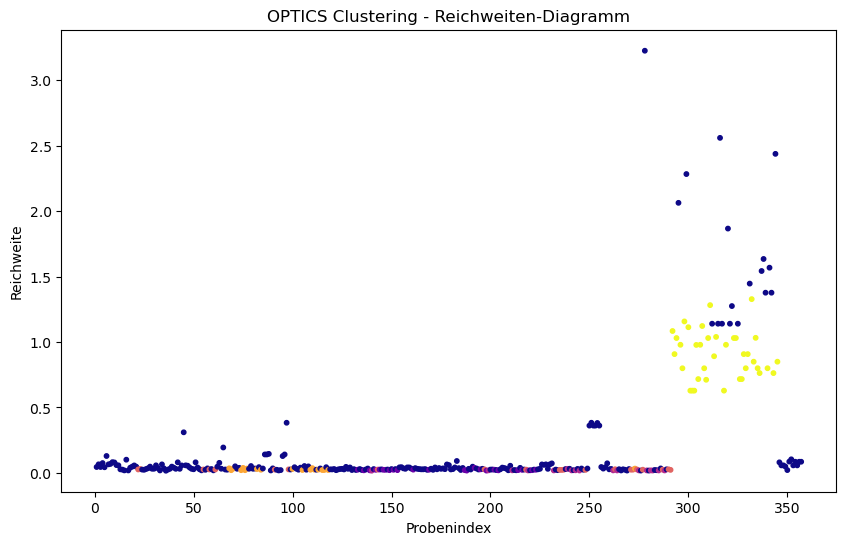

In [10]:
data = interval_data.copy()

# OPTICS-Clustering ausführen
optics = OPTICS(min_samples=5, xi=0.02, min_cluster_size=0.05)
optics.fit(data)

# Labels und Reichweitenextraktion
labels = optics.labels_
reachability = optics.reachability_

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), reachability, c=labels, cmap='plasma', s=10)
plt.title("OPTICS Clustering - Reichweiten-Diagramm")
plt.xlabel("Probenindex")
plt.ylabel("Reichweite")
plt.show()


### 3) Cluster analysieren

In [12]:
# Cluster analysieren

# Anzahl der Cluster (exkl. Rauschen)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Anzahl der Cluster: {n_clusters}")
print(f"Anzahl der rauschenhaften Punkte: {n_noise}")


Anzahl der Cluster: 5
Anzahl der rauschenhaften Punkte: 240


In [13]:
# Cluster-Zuordnung
data['Cluster'] = labels

# Cluster-Zusammenfassung
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Cluster,,,,,,,,,,,,,,,
-1,-0.231469,-0.236602,-0.238608,-0.239157,-0.238814,-0.238123,-0.234050,-0.206008,-0.244255,-0.245067,-0.245586,-0.246306,-0.246919,-0.247651,-0.248350
0,-0.358405,-0.358742,-0.357519,-0.358440,-0.358658,-0.358612,-0.362082,-0.371444,-0.354435,-0.354016,-0.353526,-0.353074,-0.352279,-0.351919,-0.350145
1,-0.401205,-0.399759,-0.399650,-0.399554,-0.398616,-0.396818,-0.395838,-0.394257,-0.387276,-0.384807,-0.381464,-0.377898,-0.374364,-0.370359,-0.365928
2,-0.431271,-0.431843,-0.433262,-0.433769,-0.434180,-0.434040,-0.433116,-0.418699,-0.433364,-0.432495,-0.431268,-0.430118,-0.428447,-0.426420,-0.424370
3,-0.467785,-0.470347,-0.472424,-0.474909,-0.477890,-0.479701,-0.478477,-0.446617,-0.492047,-0.495110,-0.498169,-0.500344,-0.501594,-0.502746,-0.502729
4,2.405195,2.439691,2.453802,2.459473,2.458728,2.454232,2.428347,2.226609,2.492968,2.497898,2.500261,2.503448,2.504954,2.507024,2.507193


### 4) Visualisierung in 2D (PCA)

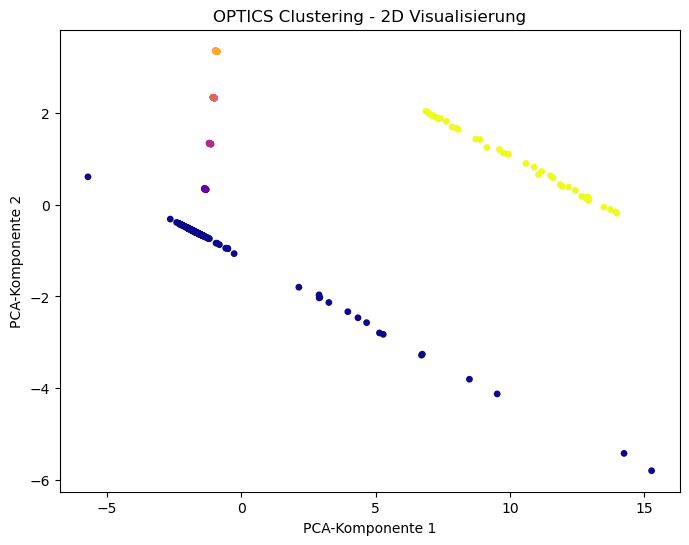

In [15]:
# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap="plasma", s=15)
plt.title("OPTICS Clustering - 2D Visualisierung")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.show()


### 5) Plot der Kurven je Cluster

In [17]:
cluster_to_samples = (data.reset_index()  # Index als Spalte hinzufügen
    .groupby('Cluster')['Probe']  # 'Probe' ist jetzt eine Spalte
    .apply(list)
    .to_dict()
)

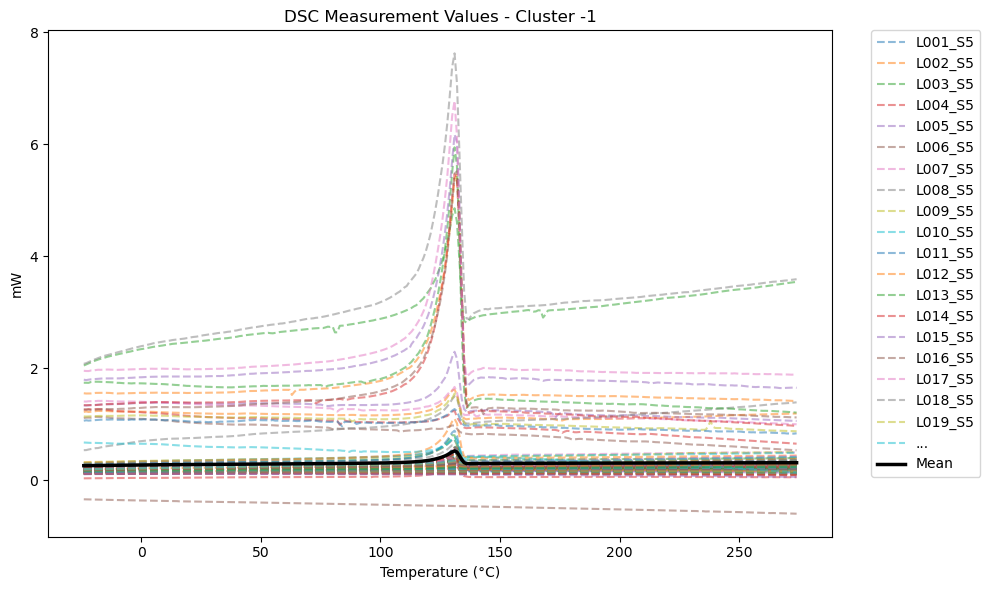

                    Count  Anteil (%)
Matrix                               
Modellsand             76       31.67
Sediment Weißeritz     42       17.50
Sand                   34       14.17
Sediment Elbe          23        9.58
Nicht vorhanden        65       27.08
------------------------------------------------------------------------------------------------------------------------


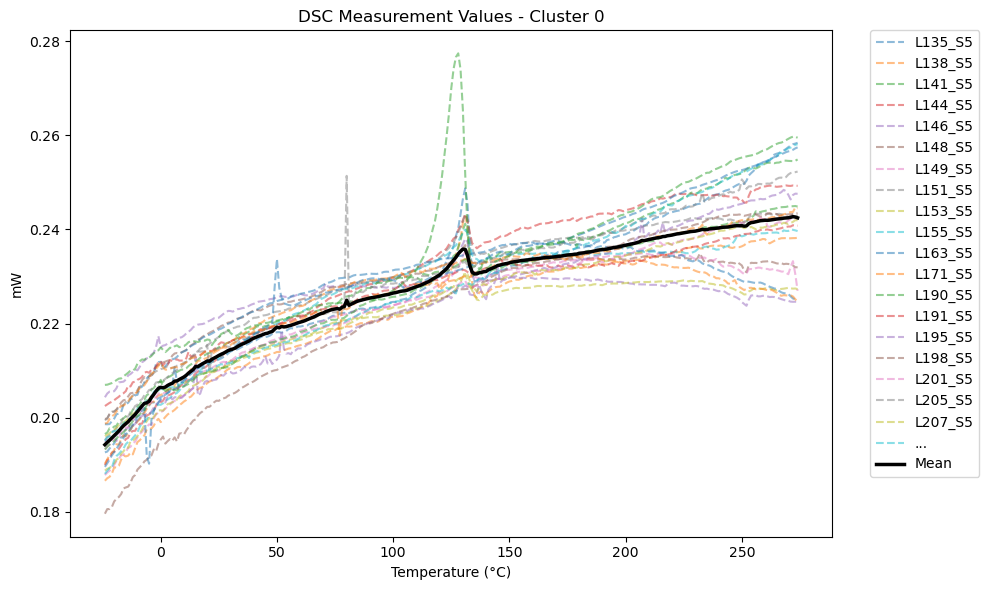

                    Count  Anteil (%)
Matrix                               
Sand                   10       43.48
Sediment Weißeritz      8       34.78
Modellsand              1        4.35
Nicht vorhanden         4       17.39
------------------------------------------------------------------------------------------------------------------------


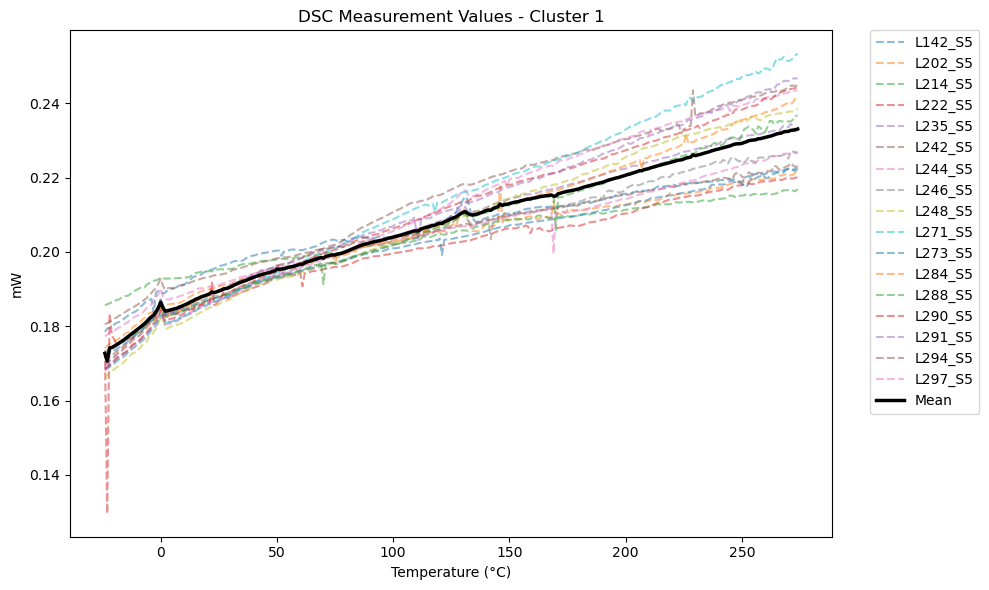

                    Count  Anteil (%)
Matrix                               
Sediment Elbe          13       76.47
Sand                    1        5.88
Sediment Weißeritz      1        5.88
Nicht vorhanden         2       11.76
------------------------------------------------------------------------------------------------------------------------


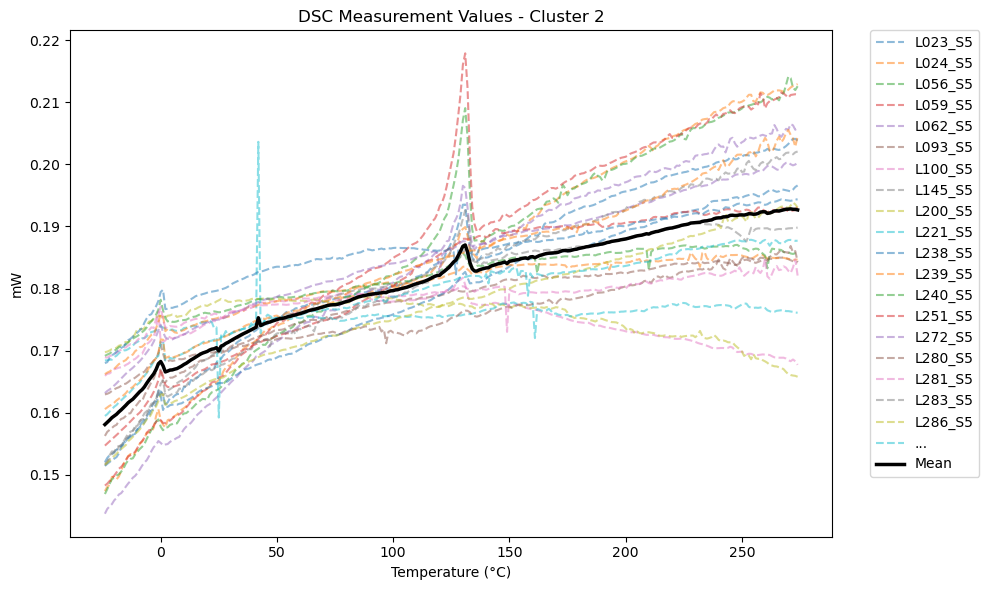

                    Count  Anteil (%)
Matrix                               
Sediment Elbe          10       45.45
Modellsand              5       22.73
Sand                    1        4.55
Sediment Weißeritz      1        4.55
Nicht vorhanden         5       22.73
------------------------------------------------------------------------------------------------------------------------


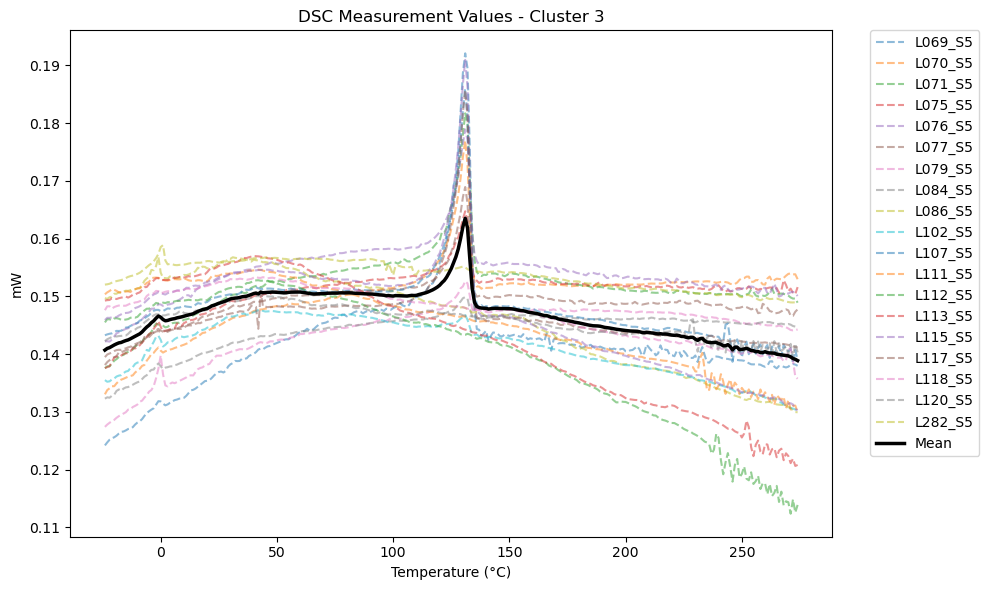

                 Count  Anteil (%)
Matrix                            
Modellsand           8       42.11
Sediment Elbe        1        5.26
Nicht vorhanden     10       52.63
------------------------------------------------------------------------------------------------------------------------


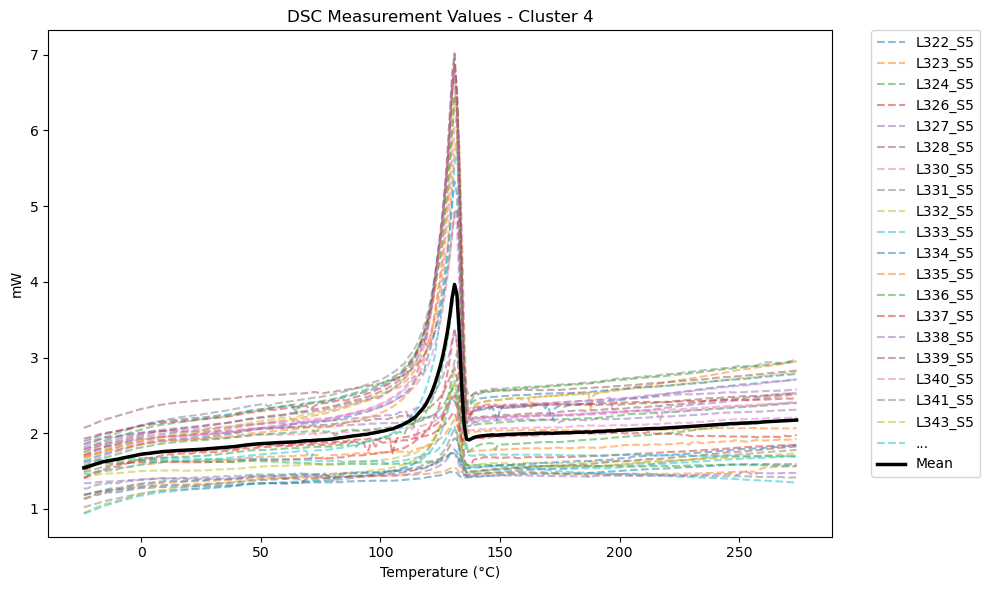

                    Count  Anteil (%)
Matrix                               
Sediment Elbe          16       43.24
Sand                   11       29.73
Sediment Weißeritz     10       27.03
------------------------------------------------------------------------------------------------------------------------


In [18]:
cluster_list = list(cluster_to_samples.items())
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

for i in range(len(cluster_list)):
    cluster, samples = cluster_list[i]
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values_with_mean(df_experiments_s5, samples, title=title)

    # Ausgabe der Ergebnisse
    print(results[cluster])
    print("-" * 120)

## II) Intervalle mit dHm und Tm
> dHm (Peakfläche) und Tm (Peakspitze)

In [20]:
enriched_data = process_and_merge_data(interval_data, df_dsc)
enriched_data

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",dHm_J/g,Tm_C
Probe,,,,,,,,,,,,,,,,,
L001_S5,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946,5.675,130.7
L002_S5,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381,4.522,130.8
L003_S5,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037,5.084,130.7
L004_S5,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454,4.175,130.3
L005_S5,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371_S5,1.717027,1.636203,1.594598,1.596946,1.627160,1.682652,1.839287,2.646520,1.428287,1.325165,1.264741,1.190903,1.122946,1.057315,0.982571,147.800,130.5
L372_S5,3.078538,2.897188,2.802745,2.759632,2.766532,2.818945,2.954687,3.597375,2.511652,2.456219,2.392159,2.306468,2.246739,2.180890,2.111986,150.600,130.5
L373_S5,2.841280,2.919753,2.990364,3.048701,3.107999,3.190102,3.316622,3.831572,3.054413,3.088635,3.081648,3.042589,3.044190,3.045442,3.033550,144.900,130.6


In [21]:
# Spalten, die skaliert werden müssen
columns_to_scale = ['dHm_J/g', 'Tm_C']

# Selektives Skalieren
scaler = StandardScaler()
data_scaled_columns = scaler.fit_transform(enriched_data[columns_to_scale])

# Ersetze die skalierten Spalten im ursprünglichen DataFrame
enriched_data[columns_to_scale] = data_scaled_columns

enriched_data

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",dHm_J/g,Tm_C
Probe,,,,,,,,,,,,,,,,,
L001_S5,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946,-0.269418,0.050186
L002_S5,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381,-0.302170,0.058680
L003_S5,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037,-0.286206,0.050186
L004_S5,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454,-0.312026,0.016208
L005_S5,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944,-0.265981,0.033197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371_S5,1.717027,1.636203,1.594598,1.596946,1.627160,1.682652,1.839287,2.646520,1.428287,1.325165,1.264741,1.190903,1.122946,1.057315,0.982571,3.767691,0.033197
L372_S5,3.078538,2.897188,2.802745,2.759632,2.766532,2.818945,2.954687,3.597375,2.511652,2.456219,2.392159,2.306468,2.246739,2.180890,2.111986,3.847226,0.033197
L373_S5,2.841280,2.919753,2.990364,3.048701,3.107999,3.190102,3.316622,3.831572,3.054413,3.088635,3.081648,3.042589,3.044190,3.045442,3.033550,3.685315,0.041691


### 2) OPTICS anwenden

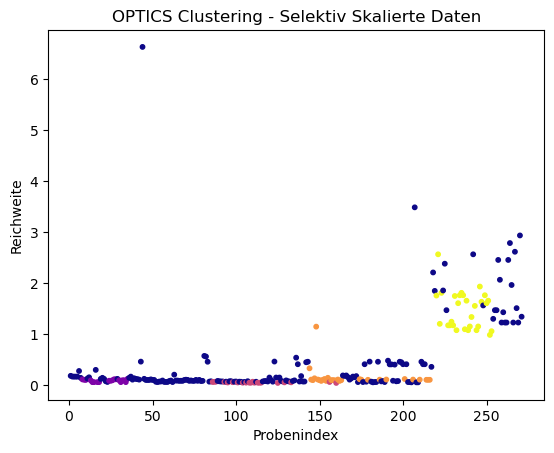

In [23]:
data  = enriched_data

# OPTICS-Clustering ausführen
optics = OPTICS(min_samples=8, xi=0.04, min_cluster_size=0.07)
optics.fit(data)

# Cluster-Labels extrahieren
labels = optics.labels_

# Ergebnisse visualisieren
plt.scatter(range(len(labels)), optics.reachability_, c=labels, cmap="plasma", s=10)
plt.title("OPTICS Clustering - Selektiv Skalierte Daten")
plt.xlabel("Probenindex")
plt.ylabel("Reichweite")
plt.show()


In [24]:
# Cluster analysieren

# Anzahl der Cluster (exkl. Rauschen)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Anzahl erfolgreich geclusterter Punkte
n_clustered_points = len(labels) - n_noise

print(f"Anzahl der Cluster: {n_clusters}")
print(f"Anzahl der rauschenhaften Punkte: {n_noise}")
print(f"Anzahl erfolgreich geclusterter Punkte: {n_clustered_points}")


Anzahl der Cluster: 4
Anzahl der rauschenhaften Punkte: 174
Anzahl erfolgreich geclusterter Punkte: 98


In [25]:
# Cluster-Zuordnung
data['Cluster'] = labels

# Cluster-Zusammenfassung
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",dHm_J/g,Tm_C
Cluster,,,,,,,,,,,,,,,,,
-1,0.018445,0.019353,0.022024,0.024835,0.028859,0.035391,0.049886,0.114083,0.027186,0.026084,0.026640,0.026362,0.025818,0.024893,0.024495,0.103094,-0.273286
0,-0.403602,-0.398705,-0.390451,-0.381751,-0.373623,-0.364016,-0.344729,-0.257101,-0.362865,-0.357557,-0.350274,-0.346174,-0.342019,-0.337108,-0.331936,0.037636,0.055998
1,-0.362336,-0.361147,-0.358208,-0.358616,-0.358641,-0.358576,-0.362243,-0.370273,-0.355110,-0.354728,-0.354617,-0.355021,-0.354957,-0.355469,-0.353756,-0.418550,0.054231
2,-0.382390,-0.383250,-0.383965,-0.385412,-0.385464,-0.384561,-0.385431,-0.388467,-0.378150,-0.376573,-0.374325,-0.371970,-0.369167,-0.365758,-0.362674,-0.430396,1.530268
3,1.957169,1.946289,1.919039,1.895510,1.863469,1.809955,1.702165,1.209674,1.834522,1.831173,1.815526,1.805719,1.795935,1.788916,1.776044,0.090265,0.033490


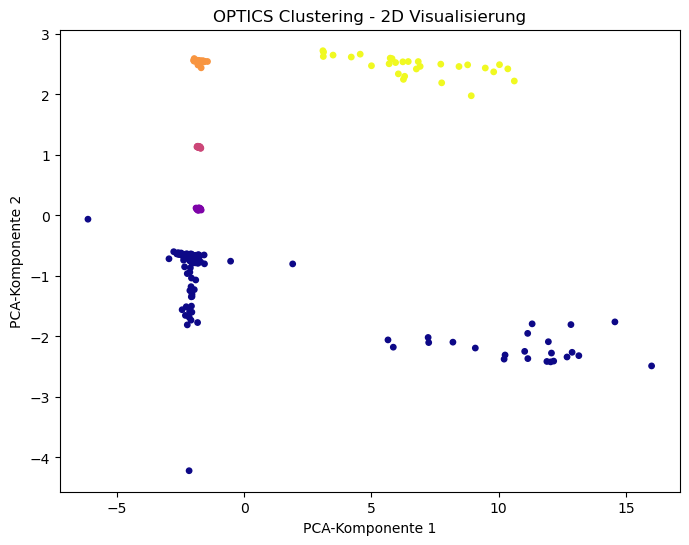

In [26]:
# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap="plasma", s=15)
plt.title("OPTICS Clustering - 2D Visualisierung")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.show()


In [27]:
df_dsc

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...
L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,1.05,147.800,130.5
L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,1.09,150.600,130.5
L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,1.00,144.900,130.6


In [28]:
cluster_to_samples = (data.reset_index()  # Index als Spalte hinzufügen
    .groupby('Cluster')['Probe']  # 'Probe' ist jetzt eine Spalte
    .apply(list)
    .to_dict()
)


cluster_list = list(cluster_to_samples.items())
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

for cluster, result_df in results.items():
    # Berechne die Gesamtanzahl der Werte in df_dsc, die in der Spalte "Matrix" gleich dem Index sind
    result_df["Von (gesamt)"] = result_df.index.map(lambda x: df_dsc[df_dsc["Matrix"] == x].shape[0])

    # Optional: Aktualisiere das Dictionary mit den neuen Werten
    results[cluster] = result_df


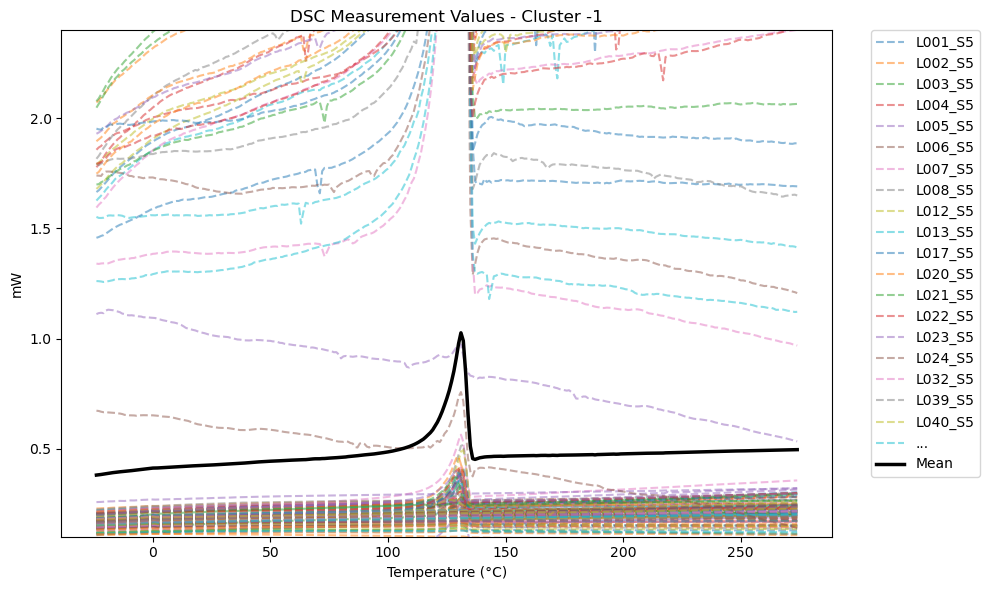

                    Count  Anteil (%)  Von (gesamt)
Matrix                                             
Modellsand             71       40.80            91
Sand                   41       23.56            57
Sediment Elbe          39       22.41            63
Sediment Weißeritz     23       13.22            63
------------------------------------------------------------------------------------------------------------------------


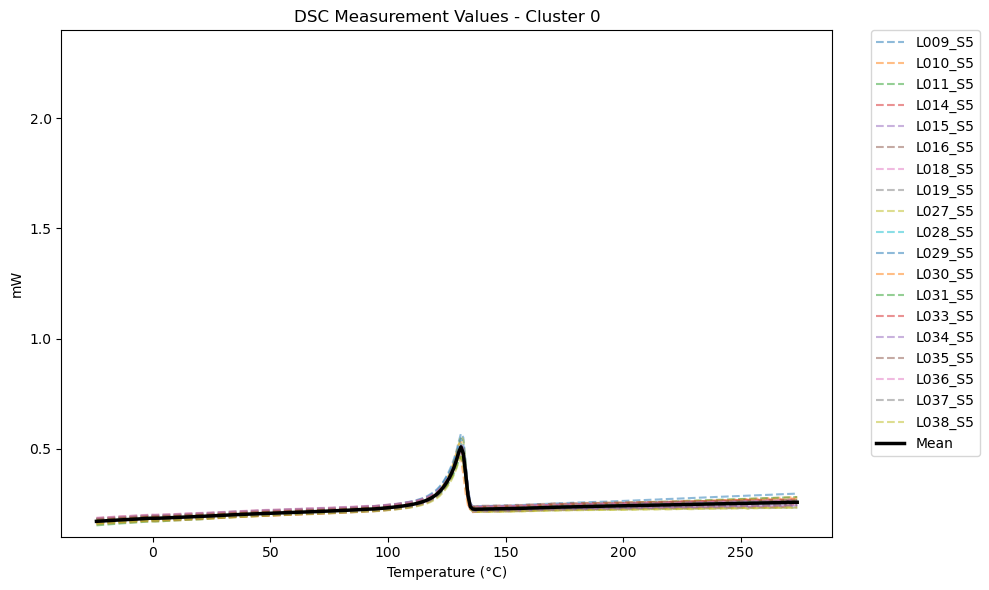

            Count  Anteil (%)  Von (gesamt)
Matrix                                     
Modellsand     19       100.0            91
------------------------------------------------------------------------------------------------------------------------


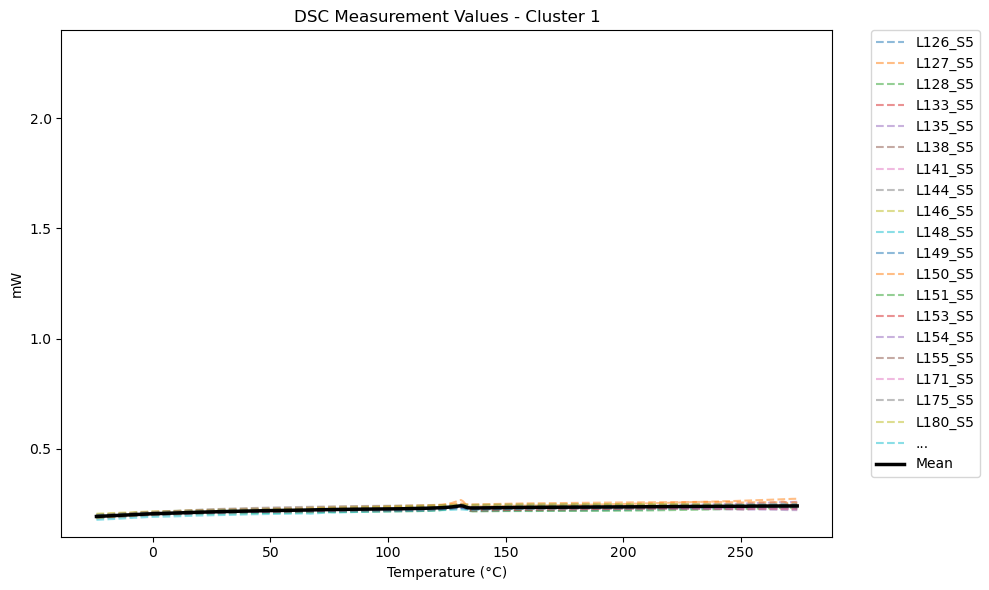

                    Count  Anteil (%)  Von (gesamt)
Matrix                                             
Sand                   16       76.19            57
Sediment Weißeritz      5       23.81            63
------------------------------------------------------------------------------------------------------------------------


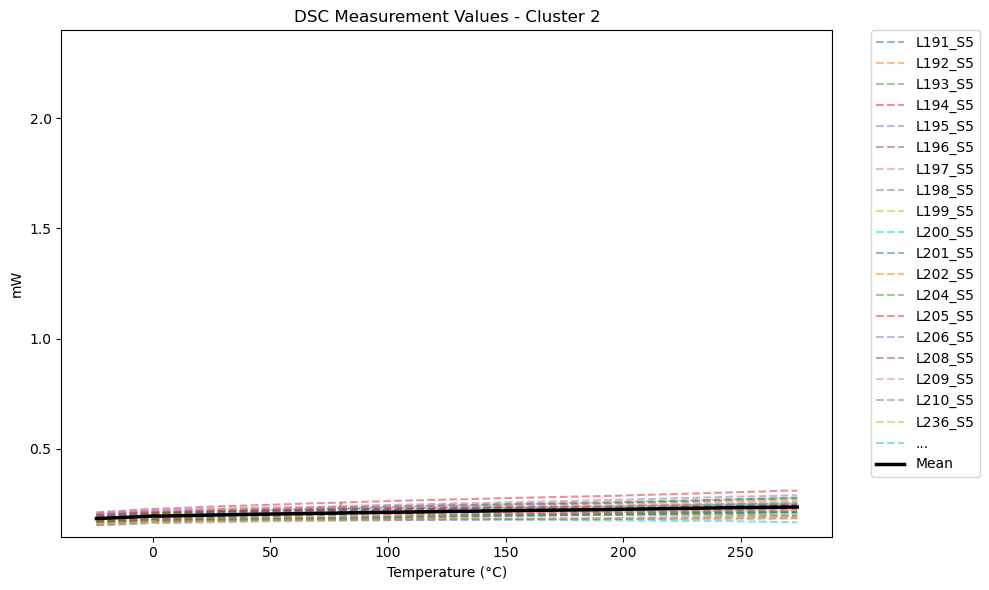

                    Count  Anteil (%)  Von (gesamt)
Matrix                                             
Sediment Weißeritz     18       62.07            63
Sediment Elbe          11       37.93            63
------------------------------------------------------------------------------------------------------------------------


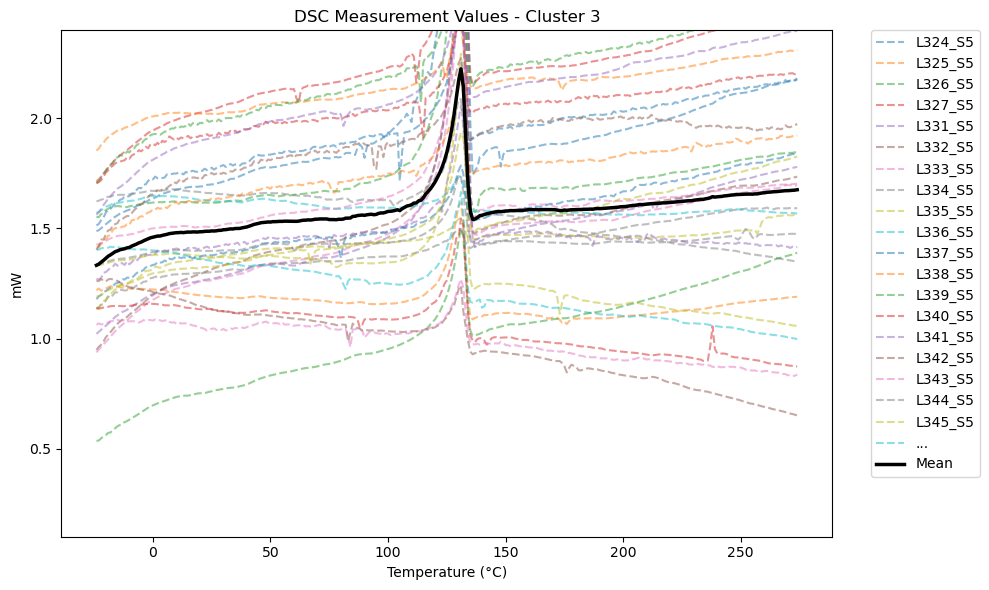

                    Count  Anteil (%)  Von (gesamt)
Matrix                                             
Sediment Weißeritz     16       55.17            63
Sediment Elbe          13       44.83            63
------------------------------------------------------------------------------------------------------------------------


In [29]:
for i in range(len(cluster_list)):
    cluster, samples = cluster_list[i]
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values_with_mean(df_experiments_s5, samples, title=title, y_min=0.1, y_max=2.4)

    # Ausgabe der Ergebnisse
    print(results[cluster])
    print("-" * 120)